In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
k2dates=pd.read_csv('K2_Dates.csv')
tessdates=pd.read_csv('TESS_FFI_observation_times.csv')

In [4]:
bestlcs=pd.read_csv('bestlcs.csv')

In [5]:
tessdates=tessdates[['Sector','Orbit','Start Time', 'End Time']]
tessdates

,Sector,Orbit,Start Time,End Time
0,1,9,7/25/18 19:29,8/8/18 0:29
1,1,10,8/9/18 3:59,8/22/18 15:59
2,2,11,8/23/18 14:29,9/5/18 15:29
3,2,12,9/7/18 2:29,9/19/18 23:59
4,3,13,9/20/18 4:59,9/21/18 0:29
...,...,...,...,...
282,91,190,4/23/25 22:09,4/30/25 13:52
283,91,190,4/30/25 18:56,5/7/25 6:09
284,92,191,5/7/25 11:09,5/14/25 0:09
285,92,192,5/21/25 4:29,5/27/25 10:32


In [6]:
tessdates['Start Time']=pd.to_datetime(tessdates['Start Time'])
tessdates['End Time']=pd.to_datetime(tessdates['End Time'])

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_5683/485386574.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tessdates['Start Time']=pd.to_datetime(tessdates['Start Time'])
/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_5683/485386574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tessdates['End Time']=pd.to_datetime(tessdates['End Time'])


In [7]:
tessdates

,Sector,Orbit,Start Time,End Time
0,1,9,2018-07-25 19:29:00,2018-08-08 00:29:00
1,1,10,2018-08-09 03:59:00,2018-08-22 15:59:00
2,2,11,2018-08-23 14:29:00,2018-09-05 15:29:00
3,2,12,2018-09-07 02:29:00,2018-09-19 23:59:00
4,3,13,2018-09-20 04:59:00,2018-09-21 00:29:00
...,...,...,...,...
282,91,190,2025-04-23 22:09:00,2025-04-30 13:52:00
283,91,190,2025-04-30 18:56:00,2025-05-07 06:09:00
284,92,191,2025-05-07 11:09:00,2025-05-14 00:09:00
285,92,192,2025-05-21 04:29:00,2025-05-27 10:32:00


In [8]:
#tessdates['End Time'].min() found a weird outlier here originally and fixed the entry in the original data table

In [9]:
#tessdates.loc[tessdates['End Time'].idxmin()]

In [10]:
tessdates=tessdates.groupby('Sector').agg({'Start Time':'min','End Time':'max'}) #getting rid of gaps in the sectors

In [11]:
tessdates=tessdates.reset_index()

In [12]:
tessdates

,Sector,Start Time,End Time
0,1,2018-07-25 19:29:00,2018-08-22 15:59:00
1,2,2018-08-23 14:29:00,2018-09-19 23:59:00
2,3,2018-09-20 04:59:00,2018-10-17 20:59:00
3,4,2018-10-19 09:59:00,2018-11-14 07:59:00
4,5,2018-11-15 11:29:00,2018-12-11 18:29:00
...,...,...,...
88,89,2025-02-11 15:09:00,2025-03-12 10:39:00
89,90,2025-03-12 15:39:00,2025-04-09 13:49:00
90,91,2025-04-09 18:49:00,2025-05-07 06:09:00
91,92,2025-05-07 11:09:00,2025-05-27 10:32:00


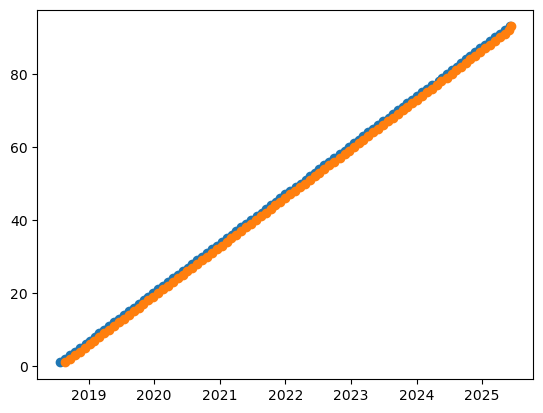

In [13]:
plt.scatter(tessdates['Start Time'],tessdates['Sector'])
plt.scatter(tessdates['End Time'],tessdates['Sector'])

In [14]:
k2dates=k2dates[['Campaign','Start','Stop']]

In [15]:
k2dates['Start']=pd.to_datetime(k2dates['Start'],format='%Y %b %d')
k2dates['Stop']=pd.to_datetime(k2dates['Stop'],format='%Y %b %d')

In [16]:
k2dates

,Campaign,Start,Stop
0,0,2014-03-08,2014-05-27
1,1,2014-05-30,2014-08-21
2,2,2014-08-23,2014-11-13
3,3,2014-11-14,2015-02-03
4,4,2015-02-07,2015-04-23
5,5,2015-04-27,2015-07-10
6,6,2015-07-14,2015-09-30
7,7,2015-10-04,2015-12-26
8,8,2016-01-03,2016-03-23
9,9,2016-04-21,2016-07-01


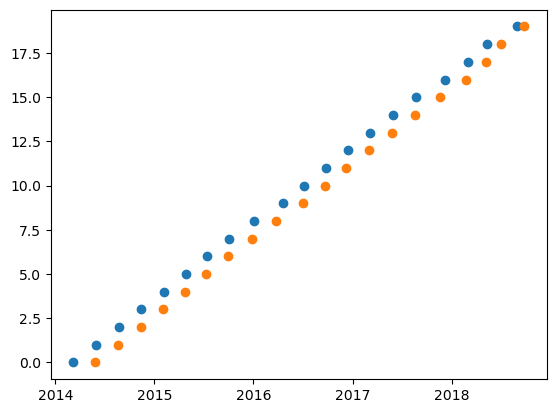

In [17]:
plt.scatter(k2dates['Start'],k2dates['Campaign'])
plt.scatter(k2dates['Stop'],k2dates['Campaign'])

In [18]:
bestlcs

,pop_id,TIC,gaiadr3_source_id,epic_id,per,group,age_Myr,disco_paper,author,paper_year,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5,Sector 6,Sector 7,Sector 8,Sector 9,Sector 10,Sector 11,Sector 12,Sector 13,Sector 14,Sector 15,Sector 16,Sector 17,Sector 18,Sector 19,Sector 20,Sector 21,Sector 22,Sector 23,Sector 24,Sector 25,Sector 26,Sector 27,Sector 28,Sector 29,Sector 30,Sector 31,Sector 32,Sector 33,Sector 34,Sector 35,Sector 36,Sector 37,Sector 38,Sector 39,Sector 40,Sector 41,Sector 42,Sector 43,Sector 44,Sector 45,Sector 46,Sector 47,Sector 48,Sector 49,Sector 50,Sector 51,Sector 52,Sector 53,Sector 54,Sector 55,Sector 56,Sector 57,Sector 58,Sector 59,Sector 60,Sector 61,Sector 62,Sector 63,Sector 64,Sector 65,Sector 66,Sector 67,Sector 68,Sector 69,Sector 70,Sector 71,Sector 72,Sector 73,Sector 74,Sector 75,Sector 76,Sector 77,Sector 78,Sector 79,Sector 80,Sector 81,Sector 82,Sector 83,Sector 84,Sector 85,Sector 86,Sector 87,Sector 88,Sector 89,Sector 90,Sector 91,Sector 92,Sector 93,Sector 94,Sector 95,Sector 96,Sector 97,Sector 98,Sector 99,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Campaign 6,Campaign 7,Campaign 8,Campaign 9,Campaign 10,Campaign 11,Campaign 12,Campaign 13,Campaign 14,Campaign 15
0,0,59129133.0,3.392549e+18,246676629.0,0.625300,Taurus,2.0,Stauffer_2018,Stauffer,2018,NaN,NaN,NaN,NaN,TIC-59129133-5-FFI-30min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59129133-32-FFI-10min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59129133-43-SPOC-120,TIC-59129133-44-SPOC-120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59129133-71-FFI-200s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPIC-246676629-13-EVEREST-1800,NaN,NaN
1,1,59091144.0,3.392554e+18,246682490.0,3.632400,Taurus,2.0,Stauffer_2018,Stauffer,2018,NaN,NaN,NaN,NaN,TIC-59091144-5-FFI-30min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59091144-32-FFI-10min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59091144-43-SPOC-120,TIC-59091144-44-SPOC-120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-59091144-71-FFI-200s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPIC-246682490-13-EVEREST-1800,NaN,NaN
2,2,118769116.0,3.411342e+18,247343526.0,0.356800,Taurus,2.0,Stauffer_2018,Stauffer,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-118769116-43-SPOC-120,TIC-118769116-44-SPOC-120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-118769116-70-FFI-200s,TIC-118769116-71-FFI-200s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPIC-247343526-13-EVEREST-1800,NaN,NaN
3,3,175594111.0,6.045819e+18,203354381.0,0.599300,Upper Scorpius,8.0,Stauffer_2018,Stauffer,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TIC-175594111-91-SPOC-120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPIC-203354381-2-EVEREST-1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,322928171.0,6.048613e+18,203636498.0,0.779400,Upper Scorpius,8.0,Stauffer_2018,Stauffer,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [19]:
bestlcs['TIC']=bestlcs['TIC'].astype('Int64').astype('string')
bestlcs['gaiadr3_source_id']=bestlcs['gaiadr3_source_id'].astype('Int64').astype('string')
bestlcs['epic_id']=bestlcs['epic_id'].astype('Int64').astype('string')

In [20]:
obstimes=pd.DataFrame(columns=['pop_id','TIC','gaiadr3_source_id','epic_id',
                               'per','disco_paper','author','paper_year',
                               'lcstring','secorcamp','start','stop'])

In [21]:
obstimes

,pop_id,TIC,gaiadr3_source_id,epic_id,per,disco_paper,author,paper_year,lcstring,secorcamp,start,stop


In [22]:
start_col=bestlcs.columns.get_loc('Sector 1')

In [23]:
for index, row in bestlcs.iterrows(): #iterate through each object
    for col in bestlcs.columns[start_col:]: #iterate through all the columns starting with the sectors
        value=row[col]
        if not pd.isna(value):
            new_row=pd.DataFrame([{'pop_id': row['pop_id'], 'TIC': row['TIC'],
                                   'gaiadr3_source_id': row['gaiadr3_source_id'], 'epic_id': row['epic_id'],
                                   'per': row['per'],'disco_paper': row['disco_paper'],
                                   'author': row['author'],'paper_year': row['paper_year'],
                                   'lcstring': value,'secorcamp': col, 'start': '', 'stop': ''}])
            obstimes=pd.concat([obstimes, new_row], ignore_index=True)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_5683/692303301.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  obstimes=pd.concat([obstimes, new_row], ignore_index=True)


In [24]:
obstimes

,pop_id,TIC,gaiadr3_source_id,epic_id,per,disco_paper,author,paper_year,lcstring,secorcamp,start,stop
0,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-5-FFI-30min,Sector 5,,
1,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-32-FFI-10min,Sector 32,,
2,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-43-SPOC-120,Sector 43,,
3,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-44-SPOC-120,Sector 44,,
4,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-71-FFI-200s,Sector 71,,
...,...,...,...,...,...,...,...,...,...,...,...,...
922,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-5-SPOC-120,Sector 5,,
923,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-6-SPOC-120,Sector 6,,
924,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-30-SPOC-120,Sector 30,,
925,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-31-SPOC-120,Sector 31,,


In [25]:
for index, row in obstimes.iterrows(): #iterate through all the rows and their sectors
    parts=row['secorcamp'].split(' ')
    secorcamp=parts[0]
    number=int(parts[1])
    if secorcamp=='Sector':
        tessrow=tessdates[tessdates['Sector']==number]
        obstimes.at[index,'start']=tessrow['Start Time'].values[0]
        obstimes.at[index,'stop']=tessrow['End Time'].values[0]
    elif secorcamp=='Campaign':
        k2row=k2dates[k2dates['Campaign']==number]
        obstimes.at[index,'start']=k2row['Start'].values[0]
        obstimes.at[index,'stop']=k2row['Stop'].values[0]

In [26]:
obstimes

,pop_id,TIC,gaiadr3_source_id,epic_id,per,disco_paper,author,paper_year,lcstring,secorcamp,start,stop
0,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-5-FFI-30min,Sector 5,2018-11-15T11:29:00.000000000,2018-12-11T18:29:00.000000000
1,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-32-FFI-10min,Sector 32,2020-11-20T17:19:00.000000000,2020-12-16T17:29:00.000000000
2,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-43-SPOC-120,Sector 43,2021-09-16T15:58:00.000000000,2021-10-11T09:18:00.000000000
3,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-44-SPOC-120,Sector 44,2021-10-12T16:28:00.000000000,2021-11-05T22:28:00.000000000
4,0,59129133,3392549449695395840,246676629,0.6253,Stauffer_2018,Stauffer,2018,TIC-59129133-71-FFI-200s,Sector 71,2023-10-16T12:41:00.000000000,2023-11-11T11:11:00.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
922,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-5-SPOC-120,Sector 5,2018-11-15T11:29:00.000000000,2018-12-11T18:29:00.000000000
923,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-6-SPOC-120,Sector 6,2018-12-15T18:29:00.000000000,2019-01-06T12:59:00.000000000
924,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-30-SPOC-120,Sector 30,2020-09-23T09:09:00.000000000,2020-10-20T17:19:00.000000000
925,207,259586708,4784133288986122240,<NA>,22.5200,Bouma_2024,Bouma,2024,TIC-259586708-31-SPOC-120,Sector 31,2020-10-22T00:19:00.000000000,2020-11-16T10:39:00.000000000


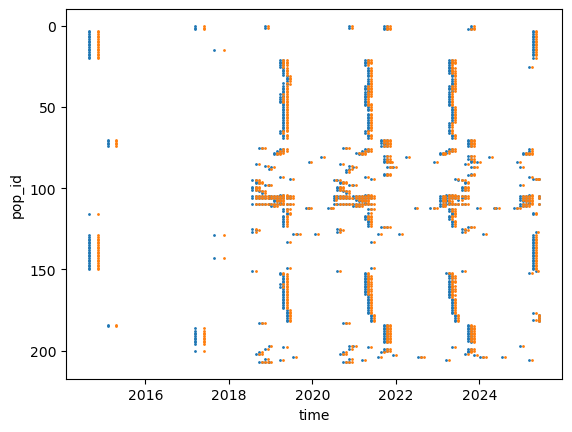

In [27]:
plt.scatter(obstimes['start'],obstimes['pop_id'],s=1)
plt.scatter(obstimes['stop'],obstimes['pop_id'],s=1)
plt.gca().invert_yaxis()
plt.ylabel('pop_id')
plt.xlabel('time')
plt.show()

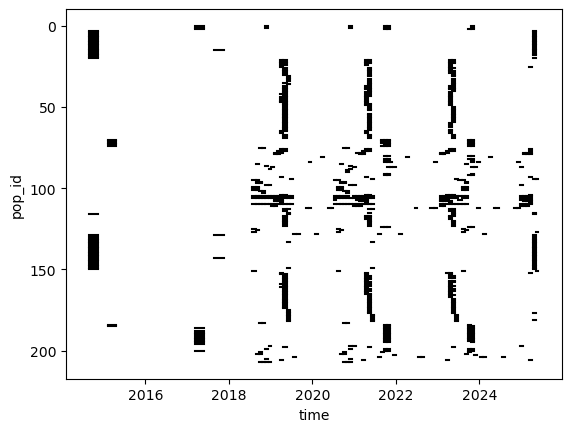

In [28]:
for index, row in obstimes.iterrows():
    x1=row.start
    x2=row.stop
    curid=row.pop_id
    plt.plot([x1,x2],[curid,curid],color='#000000')
plt.gca().invert_yaxis()
plt.ylabel('pop_id')
plt.xlabel('time')
plt.show()

In [29]:
obstimes['time_diff']=obstimes['stop']-obstimes['start']

In [30]:
totalobstimes=obstimes.groupby('pop_id').agg({'time_diff':'sum','start':'min'})

In [31]:
totalobstimes.reset_index(inplace=True)

In [32]:
totalobstimes.rename(columns={'time_diff':'total_time'},inplace=True)

In [33]:
totalobstimes.sort_values(by=['total_time','start'],inplace=True)

In [34]:
totalobstimes.reset_index(inplace=True)

In [35]:
obstimes['display_order']=''

In [36]:
for index, row in obstimes.iterrows():
    curpopid=row['pop_id']
    newindex=totalobstimes.index[totalobstimes['pop_id']==curpopid].tolist()[0]
    obstimes.at[index,'display_order']=newindex

In [37]:
conditions=[obstimes['disco_paper']=='Rebull_2016',
            obstimes['disco_paper']=='Stauffer_2017',
            obstimes['disco_paper']=='Stauffer_2018',
            obstimes['disco_paper']=='Rebull_2018',
            obstimes['disco_paper']=='Zhan_2019',
            obstimes['disco_paper']=='Rebull_2020',
            #obstimes['disco_paper']=='Koen_2020', - don't discover anything
            obstimes['disco_paper']=='Stauffer_2021',
            #obstimes['disco_paper']=='Koen_2021',
            #obstimes['disco_paper']=='Guenther_2022',
            obstimes['disco_paper']=='Rebull_2022',
            #obstimes['disco_paper']=='Koen_2022',
            obstimes['disco_paper']=='Popinchalk_2023',
            obstimes['disco_paper']=='Bouma_2024',
            obstimes['disco_paper']=='Popinchalk_2024']
outcomes=['#00007f', #rebull 1
          '#996300', #stauffer 1
          '#ffa500', #stauffer 2
          '#0000cc', #rebull 2
          '#00ff00', #zhan 1
          '#4c4cff', #rebull 3
          '#ffc966', #stauffer 3
          '#b2b2ff', #rebull 4
          '#b20e66', #popinchalk 1
          '#00ced1', #bouma 1
          '#ff5ab3'] #popinchalk 2
obstimes['color']=np.select(conditions,outcomes)

In [38]:
obstimes['author'].unique() 

array(['Stauffer', 'Rebull', 'Popinchalk', 'Bouma', 'Zhan'], dtype=object)

base colors for each author:
- Stauffer - '#ffa500'
- Rebull - '#0000ff'
- Popinchalk - '#ff1493'
- Zhan - '#00ff00'
- Bouma - '#00ced1'

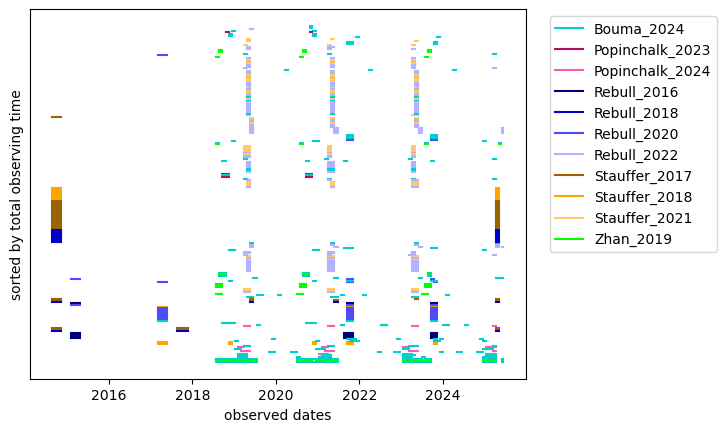

In [40]:
for index, row in obstimes.iterrows():
    x1=row.start
    x2=row.stop
    ycoord=row.display_order
    plt.plot([x1,x2],[ycoord,ycoord],color=row.color,label=row.disco_paper)
plt.gca().invert_yaxis()
plt.ylabel('sorted by total observing time')
plt.xlabel('observed dates')
plt.yticks([])
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
sorted_items = sorted(unique.items(), key=lambda item: item[0])
sorted_labels, sorted_handles = zip(*sorted_items)
plt.legend(sorted_handles, sorted_labels, loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

In [41]:
totalobstimes['days']=totalobstimes['total_time']/np.timedelta64(1, 'D')

In [42]:
print("Min: ",totalobstimes['days'].min())
print("Max: ",totalobstimes['days'].max())
print("Median: ",totalobstimes['days'].median())
print("Mean: ",totalobstimes['days'].mean())

Min:  25.430555555555557
Max:  1036.8944444444444
Median:  109.47222222222223
Mean:  134.15224692841878


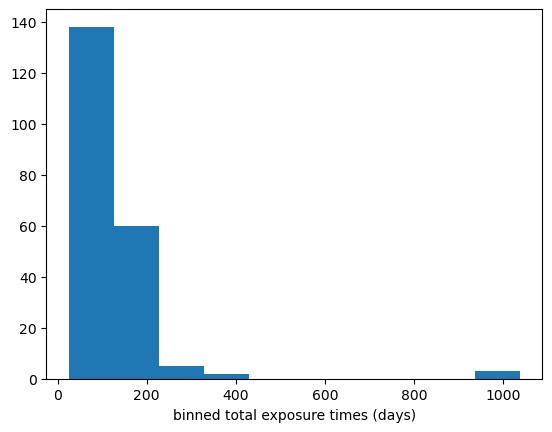

In [43]:
plt.hist(totalobstimes['days'])
plt.xlabel('binned total exposure times (days)')
plt.show()

In [44]:
totalobstimes

,index,pop_id,total_time,start,days
0,89,89,2197200000000000 nanoseconds,2020-10-22 00:19:00,25.430556
1,90,90,2197200000000000 nanoseconds,2020-10-22 00:19:00,25.430556
2,32,32,2412000000000000 nanoseconds,2019-05-21 10:59:00,27.916667
3,88,88,4128000000000000 nanoseconds,2018-12-15 18:29:00,47.777778
4,103,103,4436400000000000 nanoseconds,2018-10-19 09:59:00,51.347222
...,...,...,...,...,...
203,108,108,29431080000000000 nanoseconds,2019-02-02 20:29:00,340.637500
204,107,107,36119700000000000 nanoseconds,2019-02-02 20:29:00,418.052083
205,106,106,87189300000000000 nanoseconds,2018-07-25 19:29:00,1009.135417
206,105,105,87340680000000000 nanoseconds,2018-07-25 19:29:00,1010.887500


In [45]:
totalobstimes.shape[0]

208

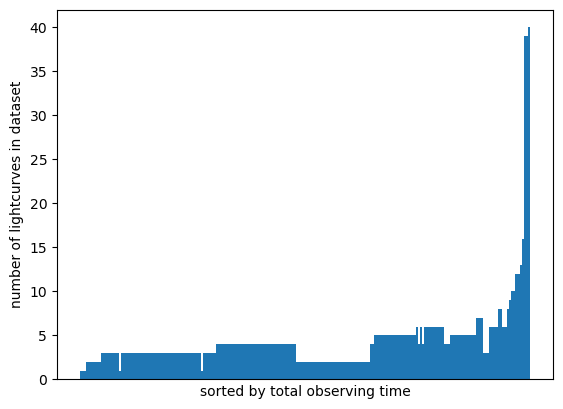

In [46]:
plt.hist(obstimes['display_order'], bins=totalobstimes.shape[0])
plt.xticks([])
plt.ylabel('number of lightcurves in dataset')
plt.xlabel('sorted by total observing time')
plt.show()

In [47]:
obstimes[obstimes['pop_id']==110].shape

(40, 15)

In [48]:
parts=np.char.split(obstimes['lcstring'].values.astype(str), sep="-")

In [49]:
parts_2d=np.array([p for p in parts])

In [50]:
obstimes['cadence_type']=parts_2d[:,4]

In [51]:
counts=obstimes['cadence_type'].value_counts()

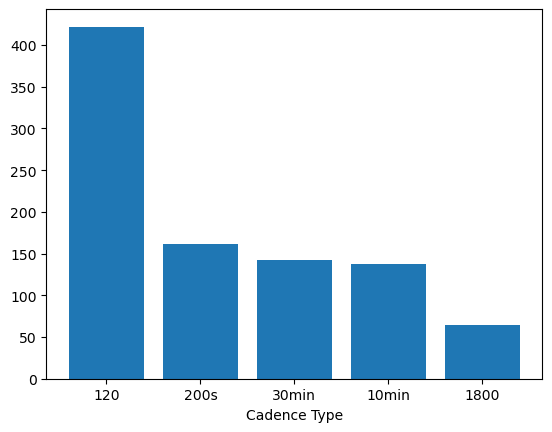

In [52]:
plt.bar(counts.index,counts.values)
plt.xlabel('Cadence Type')
plt.show()